# Homework 2: Neural Network Training

In this assignment, you will implement a neural network to solve a real-world binary classification problem. The exercises will guide you through the following tasks:

- Implement a Two-Layer Neural Network: Build a simple neural network with one hidden layer to classify data into two categories.
- Random Initialization: Properly initialize the network’s weights and biases to ensure efficient training.
- Compute the Cost using Square Loss: Implement the square loss function to evaluate the network’s performance.
- Implement Forward and Backward Propagation: Develop the forward propagation to compute the output and the backward propagation to update the network’s parameters using gradient descent.

## 0 - Packages
Let's first import necessary libraries
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
tools for data mining and data analysis.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # set a seed so that the results are consistent

## 1- Definining the neural network structure

In this exercise, you will implement a two-layer neural network, also known as a multilayer perceptron (MLP), with one hidden layer. Given a training sample $(x,y)$, the forward propagation of the network is defined as follows:

$$
\begin{align*}
z^1 =& W^1 x + b^1\\
a^1 =& \phi(z^1)\\
z^2 =& W^2 a^1 + b^2\\
a^2 =& \phi(z^2)
\end{align*}
$$
where
- $W^i$ are the weights
- $b^i$ are the bias
- $z^i$ are the pre-activaiton,
- $a^i$ are the activaiton

The network's output is $a^2$, that is then compare to the true label $y$ using the square loss function:
$$
\ell(a,y) = \frac{1}{2}(a-y)^2
$$

**Exercise 1 [10/10]**:
Define three values:
- `n_x`: the size of the input data
- `n_h`: the size of hidden layer, i.e., the number neurons in the hidden layer. The default value is $5$
- `n_y`: the size of the output



In [ ]:
def neural_network_structure(X, Y, n_h=5):
    n_x = X.shape[0]
    ### Code star here ### (~ 1 lines of code)

    ### End code here ###
    return (n_x, n_h, n_y)

In [ ]:
X = np.random.randn(2, 3)
Y = np.random.randn(1, 3)
n_x, n_h, n_y = neural_network_structure(X, Y, 10)

print("The size of the input data: n_x = " +str(n_x))
print("The size of the hidden layer: n_h = " +str(n_h))
print("The size of the output: n_y = " +str(n_y))

The size of the input data: n_x = 2
The size of the hidden layer: n_h = 10
The size of the output: n_y = 1


## 2 - Random Initialization

**Excecise 2 [10/10]**: implement the function `initialize_parameters()`.
To avoid symmetric patterns in neural networks, we’ll use random initialization for the weights.

1. The function `initialize_parameters()` has input `n_x`, `n_h`, `n_y` as inputs.
2. Use random normal distribution: `stdv * np.random.randn(a.b) + mu`, where `mu=0.0` and `stdv=1/np.sqrt(n_x)` for `W_1` and `stdv=1/np.sqrt(n_h)` for `W_2`
3. Initialize biases as zeros with the correct shape: `np.zeros((a,b))`
4. Return `parameters` as a dictionary containing all weights and biases.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) / np.sqrt(n_x)
    b1 = np.zeros((n_h, 1))
    ### Code star here ### (~ 2 lines of code)

    ### End code here ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [ ]:
parameters = initialize_parameters(n_x, n_h, n_y)
W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

print("W1 = " + str(W1))
print("b1 = " + str(b1))
print("W2 = " + str(W2))
print("b2 = " + str(b2))

W1 = [[-0.17633148  1.03386644]
 [-1.45673947 -0.22798339]
 [-0.27156744  0.80169606]
 [-0.77774057 -0.12192515]
 [-0.62073964  0.02984963]
 [ 0.41211259 -0.77825528]
 [ 0.8094419   0.63752091]
 [ 0.35531715  0.63700135]
 [-0.48346861 -0.08689651]
 [-0.66168891 -0.18942548]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.16771312 -0.21872233 -0.12546448 -0.21730309 -0.26727749 -0.21226666
  -0.0040049  -0.35332456  0.07412875  0.52487553]]
b2 = [[0.]]


## 3 - Sigmoid Function and Its Derivatives
As discussed in the lectures, the step function is unsuitable for training MLPs because its derivative is zero almost everywhere. Instead, we’ll use the sigmoid function as the activation function.

**Exercise 3 [10/10]**:
1. Implement sigmoid function `sigmoid()` as $\sigma(x)=\frac{1}{1+e^{-x}}$
2. Implement its derivative `sigmoid_derivative()` as $\sigma^{\prime}(x) = \sigma(x) \cdot (1-\sigma(x))$

In [ ]:
def sigmoid(x):
    ### Code star here ### (~ 1 lines of code)

    ### End code here ###

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
x = np.linspace(-5,5, 10)
s = sigmoid(x)
s_d = sigmoid_derivative(x)

print(s)
print(s_d)

[0.00669285 0.02005754 0.0585369  0.1588691  0.36457644 0.63542356
 0.8411309  0.9414631  0.97994246 0.99330715]
[0.00664806 0.01965523 0.05511033 0.13362971 0.23166046 0.23166046
 0.13362971 0.05511033 0.01965523 0.00664806]


## 4 - Forward Propogation

In the lecture, we covered the forward propagation for a 2-layer MLP using vectorization:
$$
\begin{align}
Z^1 &= W^1 * X + b^1\\
A^1 &= \phi(Z^1)\\
Z^2 &= W^2 * A^1 + b^2\\
A^2 &= \phi(Z^2)
\end{align}
$$

*Note*: NumPy’s broadcasting mechanism allows a bias vector `b` (shape `(n_h, 1)`) to be automatically added to each column of $W \times A$ (shape `(n_h, m)`), where `m` is the number of training samples.

 **Exercise 4 [10/10]**: Implementing forward propagation `forward_propagation()`

 1. The function `forward_propagation()` takes `X` and `parameters` as inputs
 2. Retrieve the weights and bias from `parameters`
 3. Compute `Z1`, `A1`, `Z2`, and `A2` using the equations above.
 4. Store intermediate variables in `cache` for use in backpropagation.

In [ ]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    ### Code star here ### (~ 2 lines of code)


    ### End code here ###

    # Implement Forward Propagation to calculate A2
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    ### Code star here ### (~ 2 lines of code)


    ### End code here ###

    # Store the intermedaite valeus in "cache" for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache


In [ ]:
A2, cache = forward_propagation(X, parameters)

print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.19151237249896635 0.4688525159515502 -0.3118444809339782 0.42266909957970195


## 5 - Compute the Cost
With the output estimate `A2` from forward propagation, we compute the cost using the square loss:
$$
L(\theta)=\frac{1}{2m} \sum_{i=1}^{m} (a_i-y_i)^2
$$

**Exercise 5 [10/10]**: Implement `compute_cost()`


In [ ]:
def computer_cost(A2, Y):
    m = Y.shape[1]
    ### Code star here ### (~ 1 lines of code)

    ### End code here ###
    return cost

In [ ]:
print(f"cost = {computer_cost(A2, Y)}")

cost = 0.5239053069310721


## 6 - Backpropagation
Using the `cache` computed during the forward propogation, we can compute the gradients through backpropogation
$$
\begin{align}
&d Z^2 = \frac{1}{m}( A^{2} - Y) \odot \phi^{\prime}( Z^{2}) \\
&d W^2 = d Z^2 (A^1)^{\top}\\
&d b^2 = \sum_{i=1}^{m} dZ^2_i\\
&d Z^1 = ((W^2)^{\top} dZ^2 ) \odot \phi^{\prime}(Z^1)\\
&d W^1 = d Z^1 X^{\top}\\
&d b^1 = \sum_{i=1}^{m} dZ^1_i
\end{align}
$$

**Exercise 6 [10/10]:** Implement `back_propogation()`
1. The function `back_propogation()` takes data `X` and `Y`, weights and biases in `parameters`, and `cache` as inputs
2. Retrive weights (`W1` and `W_2`) and biase (`b1` and `b2`) from `parameters`
3. Retrive cached variables (`Z1`, `Z2`, `A1`, and `A2`) from `cache`
4. Compute the gradients `dW1`, `dW2`, `db1`, `db2` using the provided formulas and you may also need to compute `dZ2` and `dZ1` as needed
5. Return gradients in a variable `grads`

*Note*: when implement `db1` or `db2`, you may consider use `np.sum()`. Let `M` be a matrix with shape `(a,b)`. Then `np.sum(M, axis=0)` sums each column, while `np.sum(M, axis=1)` sums each row. Use `keepdims=True` to maintain the dimensions summing. For example, `np.sum(M, axis=1, keepdims=True)` is used to sum across rows while preserving the shape needed for broadcasting.

In [ ]:
def back_propogation(X, Y, parameters, cache):
  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Retrieve each value from the dictionary "cache"
  Z1 = cache["Z1"]
  A1 = cache["A1"]
  Z2 = cache["Z2"]
  A2 = cache["A2"]

  # Compute gradients: dW1, db1, dW2, db2
  m = Y.shape[1]
  dZ2 = (A2 - Y)/m * sigmoid_derivative(Z2)
  dW2 = dZ2 @ A1.T
  db2 = np.sum(dZ2, axis=1, keepdims=True)
  ### Code star here ### (~ 3 lines of code)



  ### Code end here ###

  # Stores the gradients
  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}
  return grads

In [ ]:
grads = back_propogation(X, Y, parameters, cache)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-0.00664941  0.00551946]
 [ 0.00666033 -0.00568816]
 [ 0.00529232 -0.00427319]
 [ 0.01028577 -0.00799248]
 [ 0.01305662 -0.0099341 ]
 [ 0.008174   -0.0066037 ]
 [ 0.00021912 -0.00017832]
 [ 0.02062341 -0.01630933]
 [-0.004029    0.00306173]
 [-0.02714012  0.02102039]]
db1 = [[ 4.00223279e-04]
 [-2.71719312e-03]
 [-3.78546949e-04]
 [-1.13124221e-03]
 [-1.15711387e-03]
 [-9.91044386e-04]
 [-1.93340979e-06]
 [ 8.46922963e-04]
 [ 1.30854178e-04]
 [ 1.60536914e-03]]
dW2 = [[ 0.04935606  0.05904166  0.04547199  0.0361181   0.03417343 -0.05364016
  -0.01991294  0.00616847  0.02248469  0.02777064]]
db2 = [[-0.0032622]]


## 7 - Update Weights and Biases Using Gradient Descent
Gradient descents are performed using:
$$
\theta \leftarrow \theta - \eta d\theta
$$
where $\eta>0$ is the learning rate.

**Exercise 7 [10/10]**: Implemente `update_parameters()`
1. The function takes `parameters`, `grads`, and `learning_rate` as inputs
2. Retrive weights and biases from `parameters`
3. Retrive gradients from `grads`
4. Update the weights and biases using the gradient descent rule.
5. Store the updated weights and biases back into `parameters` and return them

In [ ]:
def update_parameters(parameters, grads, learning_rate):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  ### Code star here ### (~ 2 lines of code)


  ### End code here ###

  # Retrive gradients from the dictionary "grads"
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  ### Code star here ### (~ 2 lines of code)


  ### End code here ###

  # Update weights and biases using gradient descent update rule
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  ### Code star here ### (~ 2 lines of code)


  ### End code here ###

  # Store the updated weights and biases back into "parameters"
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
  return parameters

In [ ]:
parameters = update_parameters(parameters, grads, 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.17626499  1.03381124]
 [-1.45680607 -0.22792651]
 [-0.27162036  0.80173879]
 [-0.77784343 -0.12184523]
 [-0.62087021  0.02994897]
 [ 0.41203085 -0.77818925]
 [ 0.80943971  0.6375227 ]
 [ 0.35511092  0.63716444]
 [-0.48342832 -0.08692713]
 [-0.66141751 -0.18963568]]
b1 = [[-4.00223279e-06]
 [ 2.71719312e-05]
 [ 3.78546949e-06]
 [ 1.13124221e-05]
 [ 1.15711387e-05]
 [ 9.91044386e-06]
 [ 1.93340979e-08]
 [-8.46922963e-06]
 [-1.30854178e-06]
 [-1.60536914e-05]]
W2 = [[ 0.16721956 -0.21931275 -0.1259192  -0.21766427 -0.26761923 -0.21173026
  -0.00380577 -0.35338624  0.07390391  0.52459783]]
b2 = [[3.262196e-05]]


## 8 - Training Loop

**Exercise 8 [10/10]**: Integrate the preivous parts into a function `train_loop()`.
1. The function `train_loop()` takes input data `(X,Y)` and network size `n_h`, and `learning_rate` with `max_iteration` as inputs
2. Retrive `(n_x,n_h,n_y)` using `neural_network_structure()`
3. Initialize the parameters using `initialize_parameters()`
4. Create a `for` loop to train the network by calling `forward_propagation()` to compute the `cost` and `cach`, `back_propagation()` to compute the `grads`, then `update_parameters()` to update `parameters`.

In [ ]:
def train_loop(X, Y, n_h, learning_rate, max_iteration, print_cost=True):
  # Retrive (n_x, n_h, n_y)
  n_x, n_h, n_y = neural_network_structure(X, Y, n_h)

  # Initialize the parameters
  parameters = initialize_parameters(n_x, n_h, n_y)

  for iter in range(max_iteration):
    # Forward propagation
    ### Code star here ### (~ 1 lines of code)


    ### End code here ###

    # Compute loss
    cost = computer_cost(A2, Y)
    if print_cost:
      print(f"Epoch {iter}: Loss = {cost}")

    # Backward propagation
    ### Code star here ### (~ 1 lines of code)


    ### End code here ###

    # Update parameters
    ### Code star here ### (~ 1 lines of code)

    ### End code here ###

  return parameters

In [ ]:
parameters = train_loop(X, Y, 10, 0.01, 10)

Epoch 0: Loss = 0.5413416581298806
Epoch 1: Loss = 0.5411639794561593
Epoch 2: Loss = 0.5409863314471564
Epoch 3: Loss = 0.540808715111546
Epoch 4: Loss = 0.5406311314554088
Epoch 5: Loss = 0.5404535814821864
Epoch 6: Loss = 0.5402760661926396
Epoch 7: Loss = 0.5400985865848044
Epoch 8: Loss = 0.5399211436539499
Epoch 9: Loss = 0.5397437383925353


### 8.1 - Training on Real Dataset

Let us test your MLP model on the MNIST dataset, which contains images of digits `0` through `9`. For simplicity, we will select only the digits `0` and `1` for binary classification.

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the 28x28 images into vectors of 784 elements and normalize to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # Transpose to (in_features, num_samples)
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0     # Transpose to (in_features, num_samples)

# Select only the samples of class '0' and '1' for binary classification
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

X_train_binary = X_train[:, train_filter]
y_train_binary = y_train[train_filter].reshape(1, -1)  # Reshape to (1, num_samples)

X_test_binary = X_test[:, test_filter]
y_test_binary = y_test[test_filter].reshape(1, -1)  # Reshape to (1, num_samples)

# Verify the shapes
print(f"Training data shape: {X_train_binary.shape}")  # Should be (784, num_samples)
print(f"Training labels shape: {y_train_binary.shape}")  # Should be (1, num_samples)
print(f"Testing data shape: {X_test_binary.shape}")  # Should be (784, num_samples)
print(f"Testing labels shape: {y_test_binary.shape}")  # Should be (1, num_samples)

# Print out some example labels to verify
print("Training labels:", np.unique(y_train_binary))
print("Testing labels:", np.unique(y_test_binary))

Training data shape: (784, 12665)
Training labels shape: (1, 12665)
Testing data shape: (784, 2115)
Testing labels shape: (1, 2115)
Training labels: [0 1]
Testing labels: [0 1]


Using the following code, we can visualize a few examples from the dataset

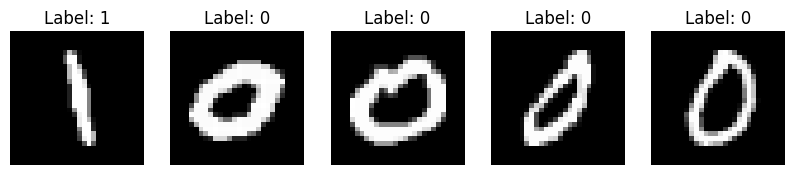

In [ ]:
# Select a few random indices
indices = np.random.choice(X_train_binary.shape[1], size=5, replace=False)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, idx in enumerate(indices):
    image = X_train_binary[:, idx].reshape(28, 28)
    label = y_train_binary[0, idx]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [ ]:
parameters = train_loop(X_train_binary, y_train_binary, 10, 0.01, 10)

Epoch 0: Loss = 0.15423868236507246
Epoch 1: Loss = 0.1538372075502308
Epoch 2: Loss = 0.1534339482553399
Epoch 3: Loss = 0.15302893320861544
Epoch 4: Loss = 0.15262219214320855
Epoch 5: Loss = 0.15221375579440194
Epoch 6: Loss = 0.15180365589554054
Epoch 7: Loss = 0.15139192517266983
Epoch 8: Loss = 0.15097859733785732
Epoch 9: Loss = 0.1505637070811758


## 9 - Predictions
Use your trained model to make predictions by building `predict()`.

**Exercise 9 [10/10]:**
1. The function `predict()` takes `X` and `parameters` as inputs
2. Call `forward_propagation()` to obtain the output `A2`
3. Assign labels using threshold `0.5`; label class `1` if `A2 > 0.5`

In [ ]:
def predict(X, parameters):
    A2, cache = forward_propagation(X, parameters)
    ### Code star here ### (~ 3 lines of code)


    ### End code here ###
    return predictions

In [ ]:
predictions = predict(X_train_binary, parameters)
print(f"Training Accuracy: {np.mean(predictions == y_train_binary)}")

Training Accuracy: 0.5323332017370707


In [ ]:
predictions = predict(X_test_binary, parameters)
print(f"Testing Accuracy: {np.mean(predictions == y_test_binary)}")

Testing Accuracy: 0.5366430260047281


## 10 - Tuning Network Hyperparameters

In this two-layer MLP, we have the following hyperparameters: network size `n_h`, `learning_rate`, and `max_iteration`. The choice of these values will influence the network's performance.

**Exercise 10 [10/10]**: Experiment with different values for network size `n_h` to observe how the network size influences performance.



In [ ]:
np.random.seed(1)
network_sizes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n_h in network_sizes:
    parameters = train_loop(X_train_binary, y_train_binary, n_h, 0.01, 10, False)
    ### Code star here ### (~ 4 lines of code)




    ### End code here ###
    print(f"Network Size: {n_h}, Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}")


Network Size: 5, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 10, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 20, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 30, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 40, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 50, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 60, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 70, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 80, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 90, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 100, Training Accuracy: 0.53233320173

## Congratulations!

Well done on completing the assignment! You’ve implemented a two-layer neural network from scratch and trained it to solve a real binary classification problem. This is a significant milestone in understanding how neural networks work.

Feel free to play around with the code, adjust the hyperparameters, and observe how they affect the network’s performance. By experimenting, you’ll gain a deeper insight into how neural networks learn and how tuning can improve results. Keep pushing your boundaries, and remember that each experiment brings you one step closer to mastering machine learning. Great job, and keep up the excellent work! 🎉🚀